<a href="https://colab.research.google.com/github/cruzslet/MVP.Analise-de-Dados-e-Boas-Praticas/blob/main/Kings_League_Estudo_de_caso_da_creator_economy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**A Economia Criativa Brasileira como Alicerce da Kings League**



##**Introdução**

###**Definição do Problema:**

A Kings League Brasil é uma modalidade de esporte que não veio para substituir o tradicional, mas que reinventa do consumo esportivo para um formato feito feita sob medida para a geração Z, conhecida por sua atenção fragmentada. Ao unir creators, gamificação e ,últiplas plataformas digitais, ela se encaixa perfeitamente na lógica da economia criativa brasileira — um ecossistema que valoriza narrativas culturais, produção descentralizada e influência das comunidades.

Mas a pergunta que queremos responder é: como a estrutura da economia criativa no Brasil viabiliza esse modelo e quais são as oportunidades reais para as marcas dentro disso?

- **Objetivo:**

Mapear a relação entre as conversas sobre o campeonato e os times com os as conversas sobre os patrocinadores da primeira Split, de modo a mapear oportunidades para marcas em termos de storytelling, parcerias e modelos de negócio com base na análise dos dados e do comportamento de audiência.

- **Descrição do Problema:**

A Kings League já mostrou que é capaz de mobilizar milhões, mas ainda está em fase de definição cultural no Brasil. E é exatamente aí que entra o potencial das marcas — ocupar um espaço que ainda está sendo moldado, dentro de uma lógica criativa e colaborativa. A economia criativa oferece as ferramentas e a linguagem. O desafio é decodificar onde estão as brechas e os caminhos.

- **Tipo de Problema:**

Análise exploratória e descritiva baseada em dados da audiência, engajamento e presença digital, com a possibilidade de evoluir para uma estrutura preditiva de comportamento de audiência e impacto de marca.

- **Premissas e Hipóteses**:

 - **Premissa:** O Brasil tem uma das economias criativas mais ativas do mundo, e isso influencia diretamente a forma como novos produtos de entretenimento são consumidos.

 - **Hipótese:**

1. O modelo descentralizado da Kings League alavanca o potencial da economia criativa brasileira.

2. Apesar do patrocínio ativo, a maior parte das marcas não produziu conteúdo sobre a Kings League ou criou ações para engajar a audiência fora dos jogos, o que pode ter impactado negativamente os resultados do investimento.

3. O “entretempo” (momentos entre os jogos) é uma oportunidade subaproveitada onde marcas podem criar cultura e comunidade.

- **Restrições e Condições:**

 - **Restrições:** Os dados são baseados em um primeiro split, o que exige cuidado com generalizações.

- **Descrição do dataset:**

1. **Fontes**
- Dados extraídos via Sprout Social e Escharts sobre audiência, postagens, engajamento e canais de transmissão da Kings League Brasil durante todo o primeiro semestre de 2025, mas com ênfase no período ativo da liga 20 de março a 20 de maio de 2025.

2. **Estrutura de dados:**
 - Atributos:
  - Data de Publicação – data em que as postagemns foiram publicadas.
  - Contagem de postagens – número de postagens feitas nessa data.
  - Contagem de Perfis – número de perfis que publicaram nesse dia.
  - Taxa de engajamento – percentual de engajamento por base de seguidores
  - Engajamento – número absoluto de interações (curtidas, comentários, salvos, compartilhamentos, etc).
  - Impressões – número de vezes que a postagem foi exibida.
  -Visualizações – visualizações.
  - Rede – rede social
  - Tipo – tipo de publicação (ex: Publicidade X Orgnânico).
  - Assunto – tema abordado (ex: Times X Patrocinadores).

 - Instâncias: datas ao longo do primeiro semestre de 2025.

3. **Tipos de dados:**
Temos uma combinação de dados numéricos (int ou float), data (datetime) e texto (string), sendo:
  - Data de Publicação – data
  - Contagem de postagens, Contagem de Perfis, Engajamento, Impressões e Visualizações - númericos
  - Taxa de engajamento, Tipo e Assunto – texto

##**Estrutura do projeto:**

1. Coleta de dados
2. Exploração inicial do dataset
3. Transformação dos dados
4. Clusterização
5. Análise preditiva
6. Conclusões e recomendações

##**Visualizações (sugestões para análise gráfica):**
Distribuição da audiência por jogo (gráfico de linhas): mostra os picos e vales da atenção.

Engajamento por canal (top creators) (gráfico de barras): revela quais canais/personas sustentam a conversa.

Mapa de calor dos dias da semana vs. volume de interações: pode indicar quando o público está mais ativo.

Comparação entre audiência da KL x jogos do Brasileirão no mesmo fim de semana: para evidenciar mudança de hábito.

## **1. Coleta de dados**

---
1.1 **Importar bibliotecas**

In [797]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.stats.mstats import winsorize
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings("ignore")

1.2 **Carregamento dos Dados**:
  
  O dataset foi construído com dados reais, extraídos da plataforma de CRM Sprout Social. Ele é carregado a partir de um arquivo CSV. Ele contém dados de performance agrupados por data sobre diferentes tipos de conteúdos publicados durante o primeiro semestre de 2025 mencionando alguma temática relacionada ao campeonato da Kings League.

In [798]:
import requests

file_url = 'https://raw.githubusercontent.com/cruzslet/MVP.Analise-de-Dados-e-Boas-Praticas/123e651835bda5da62196acd35746777ee95cc44/Kings%20League.csv'

try:
    response = requests.get(file_url)
    response.raise_for_status() # Raise an HTTPError for bad responses (4xx or 5xx)
    with open('Kings_League.csv', 'wb') as f:
        f.write(response.content)
    print("File downloaded successfully.")

    # Now read the downloaded file
    data = pd.read_csv('Kings_League.csv')
    print(data.head())

except requests.exceptions.RequestException as e:
    print(f"Error downloading the file: {e}")
except FileNotFoundError:
    print("The downloaded file was not found.")
except pd.errors.ParserError as e:
    print(f"Error parsing the CSV file: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

File downloaded successfully.
   Data de Publicação  Contagem de postagens  Contagem de Perfis  \
0  01 de jan. de 2025                      1                   1   
1  02 de jan. de 2025                      1                   1   
2  03 de jan. de 2025                      1                   1   
3  04 de jan. de 2025                      1                   1   
4  09 de jan. de 2025                      3                   3   

  Taxa de engajamento Engajamento Impressões Visualizações       Rede  \
0               8,40%      20.503    244.166             -  Instagram   
1               0,54%         428     78.740        18.866  Instagram   
2               0,84%          33      3.951             -  Instagram   
3               0,61%          24      3.951             -  Instagram   
4               2,85%       1.162     40.725             -  Instagram   

          Tipo Assunto  
0  Publicidade   Times  
1  Publicidade   Times  
2  Publicidade   Times  
3  Publicidade   Times

In [799]:
data.shape

(2775, 10)

Temos 10 atributos e 2775 instância, vamos verificar se os tipos de dados estão corretos:

In [800]:
data.dtypes

,0
Data de Publicação,object
Contagem de postagens,int64
Contagem de Perfis,int64
Taxa de engajamento,object
Engajamento,object
Impressões,object
Visualizações,object
Rede,object
Tipo,object
Assunto,object



1.3 **Pré-processamento dos Dados**:

  1.3.1 **Tratamento de valores inconsistentes**:
     Muitos valores que deveriam ser numéricos ou data estão sendo lidos como object. Por isso, nessa etapa, valores inconsistentes (como '%' e ',') serão identificados e eliminados para que as strings possam ser convertidas em números.

In [801]:
# Converter data
# Mapeiar os meses abreviados em português para número
meses_pt = {
    'jan.': '01', 'fev.': '02', 'mar.': '03', 'abr.': '04', 'mai.': '05', 'jun.': '06',
    'jul.': '07', 'ago.': '08', 'set.': '09', 'out.': '10', 'nov.': '11', 'dez.': '12'
}

# Função para ubstituição
def converter_data_pt(data_str):
    if isinstance(data_str, str):
        for abrev, num in meses_pt.items():
            if abrev in data_str:
                data_str = data_str.replace(abrev, num)
        try:
            return pd.to_datetime(data_str, format='%d de %m de %Y')
        except:
            return pd.NaT
    return pd.NaT

# Aplicar ao dataFrame
data['Data de Publicação'] = data['Data de Publicação'].apply(converter_data_pt)
data['Data de Publicação'] = pd.to_datetime(data['Data de Publicação'], format='%d de %b. de %Y', errors='coerce')

# Função para limpar valores numéricos
def limpar_valor(valor):
    if isinstance(valor, str):
        valor = valor.replace('.', '')  # remove separador de milhar
        valor = valor.replace(',', '.')  # transforma vírgula decimal em ponto
        valor = valor.replace('%', '')  # remove símbolo de porcentagem
        valor = valor.strip()
        if valor == '-' or valor == '':
            return None
    try:
        return float(valor)
    except:
        return None

# Aplicar a limpeza nas colunas
colunas_para_limpar = ['Taxa de engajamento', 'Engajamento', 'Impressões', 'Visualizações']
for col in colunas_para_limpar:
    data[col] = data[col].apply(limpar_valor)


In [802]:
data.dtypes

,0
Data de Publicação,datetime64[ns]
Contagem de postagens,int64
Contagem de Perfis,int64
Taxa de engajamento,float64
Engajamento,float64
Impressões,float64
Visualizações,float64
Rede,object
Tipo,object
Assunto,object


## **2. Exploração inicial do dataset**
2.1 **Perfil estatístico**:

In [803]:
# Selecionar só as colunas numéricas
colunas_numericas = data.select_dtypes(include=[np.number]).columns

# Criar um dicionário para armazenar as métricas
resumo = {}

for col in colunas_numericas:
    serie = data[col]
    resumo[col] = {
        'mínimo': serie.min(),
        'máximo': serie.max(),
        'mediana': serie.median(),
        'moda': serie.mode().iloc[0] if not serie.mode().empty else np.nan,
        'média': serie.mean(),
        'desvio-padrão': serie.std(),
        'valores ausentes': serie.isna().sum()
    }

# Converter pra DataFrame
resumo_df = pd.DataFrame(resumo).T

# Exibe o resumo
print(resumo_df)

                       mínimo       máximo    mediana  moda         média  \
Contagem de postagens     1.0        565.0      14.00  1.00  5.172288e+01   
Contagem de Perfis        1.0        479.0      12.00  1.00  4.285153e+01   
Taxa de engajamento       0.0        241.0       1.64  0.02  4.149425e+00   
Engajamento               0.0    6591725.0   19219.00  1.00  1.237762e+05   
Impressões                0.0  132461099.0       0.00  0.00  2.058625e+06   
Visualizações             0.0   94941537.0  259047.00  0.00  1.170343e+06   

                       desvio-padrão  valores ausentes  
Contagem de postagens   9.358701e+01               0.0  
Contagem de Perfis      8.251707e+01               0.0  
Taxa de engajamento     1.114338e+01             461.0  
Engajamento             3.250579e+05             371.0  
Impressões              7.674093e+06               0.0  
Visualizações           4.107009e+06             574.0  


A maior parte das métricas apresenta viés forte, ou seja, muitos dias com números baixos, poucos dias com números altíssimos. No entanto, o que amis chama atenção é a quantidade de valores faltantes em colunas importantes como engajamento, visualizações e taxa de engajamento. Isso ocorre porque algumas redes consideram impressões enquanto outras consideram visualizações e ainda, a Twitch não considera nem engajamento nem taxa de engajamento. Vamos unificar impressões e visualizações em uma única métrica para evitar discrepâncias e excluir as linhas em que esse valor estiver faltante:


In [804]:
# Padroniza os nomes das redes pra evitar inconsistências de capitalização
data['Rede'] = data['Rede'].str.strip().str.capitalize()

# Definir os grupos
redes_impressao = ['Instagram', 'Facebook']
redes_visualizacao = ['Tiktok', 'Youtube', 'Twitch', 'Twitter']

# Criar a nova coluna 'Alcance'
data['Alcance'] = data.apply(
    lambda row: row['Impressões'] if row['Rede'] in redes_impressao
    else row['Visualizações'] if row['Rede'] in redes_visualizacao
    else None,
    axis=1
)
# Excluir linhas com valores faltantes na coluna 'Alcance'
data = data.dropna(subset=['Alcance'])
data = data[data['Alcance'] != 0]

#Excluir Impressões e Visualizações para evitar erros no futuro
data.drop(columns=['Impressões', 'Visualizações'], inplace=True)


Agora repetimos o perfil estatístico.

In [805]:
# Selecionr só as colunas numéricas
colunas_numericas = data.select_dtypes(include=[np.number]).columns

# Criar um dicionário para armazenar as métricas
resumo = {}

for col in colunas_numericas:
    serie = data[col]
    resumo[col] = {
        'mínimo': serie.min(),
        'máximo': serie.max(),
        'mediana': serie.median(),
        'moda': serie.mode().iloc[0] if not serie.mode().empty else np.nan,
        'média': serie.mean(),
        'desvio-padrão': serie.std(),
        'valores ausentes': serie.isna().sum()
    }

# Converter pra DataFrame
resumo_df = pd.DataFrame(resumo).T

# Exibir o resumo
print(resumo_df)

                       mínimo       máximo    mediana   moda         média  \
Contagem de postagens     1.0        565.0      14.00   1.00  5.211313e+01   
Contagem de Perfis        1.0        479.0      12.00   1.00  4.317461e+01   
Taxa de engajamento       0.0        241.0       1.64   0.02  4.091286e+00   
Engajamento               0.0    6591725.0   19479.50   1.00  1.245939e+05   
Alcance                   1.0  132461099.0  507433.00  13.00  2.785678e+06   

                       desvio-padrão  valores ausentes  
Contagem de postagens   9.393571e+01               0.0  
Contagem de Perfis      8.283478e+01               0.0  
Taxa de engajamento     1.089924e+01             455.0  
Engajamento             3.262229e+05             365.0  
Alcance                 8.348715e+06               0.0  


Os principais pontos de destaque são:

1. Distribuição enviesada
A média  de alcance (2,8M) é muito superior a mediana (500K), o que sugere que temos dias com alcances muito altos puxando a média pra cima. A moda = 13 reforça que muitos dias registraram alcance baixíssimo.

2. Desvio padrão extremamente alto (~8,3M)
Mostra uma variabilidade absurda e aciona um alerta de cautela para usar médias como referência.

3. Alcance típico mais realista
A mediana de ~500 mil é um ótimo indicador do "dia padrão" de alcance. Em termos estratégicos, é uma boa referência pra avaliar se uma campanha performou acima ou abaixo do esperado.

2.2 **Visualização temporal**:

Vamos verifique a distribuição de cada atributo ao longo do tempo, começando pelo alcance:
(essa, na verdade, é a segunda vez que realizamos essa etapa. Na primeira, percebemos que os meses de fevereiro e junho estavam vazios porque as datas estão em português, por isso recomeçamos a análise fazendo essa conversão textual antes da conversão de fomato.

Se for um problema de classificação, verifique a distribuição de frequência das classes. O que você percebe? Dica: esta etapa pode indicar a possível necessidade futura de balanceamento de classes.
Analise os atributos individualmente ou de forma combinada, usando os gráficos mais apropriados.


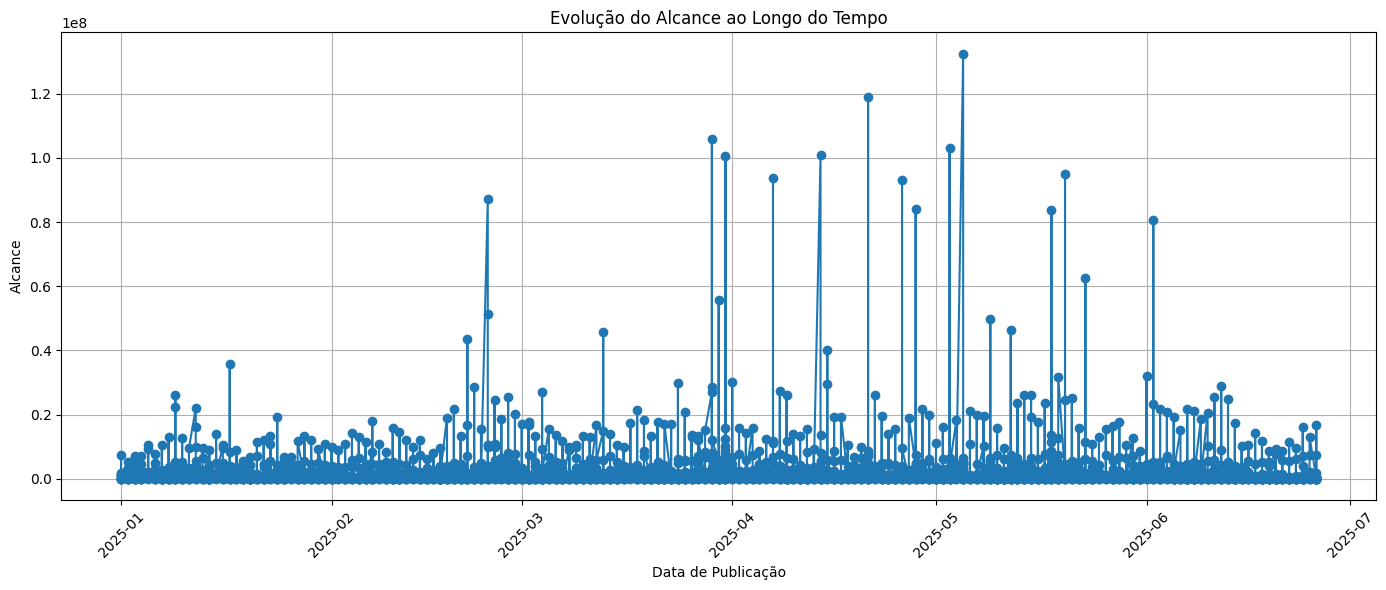

In [806]:
# Filtra só os dados com valor de Alcance válido
data_plot = data[['Data de Publicação', 'Alcance']].dropna()

# Ordena por data, só pra garantir que a linha fique certa
data_plot = data_plot.sort_values('Data de Publicação')

# Cria o gráfico
plt.figure(figsize=(14, 6))
plt.plot(data_plot['Data de Publicação'], data_plot['Alcance'], marker='o', linestyle='-')

plt.title('Evolução do Alcance ao Longo do Tempo')
plt.xlabel('Data de Publicação')
plt.ylabel('Alcance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)

plt.show()

Percebemos alguns picos facilmente relacionados a dias de anúncios e jogos importantes da liga e uma baixa constante no período que antecede e procede às atividades. A volumetria de postagens se comporta de forma similar:

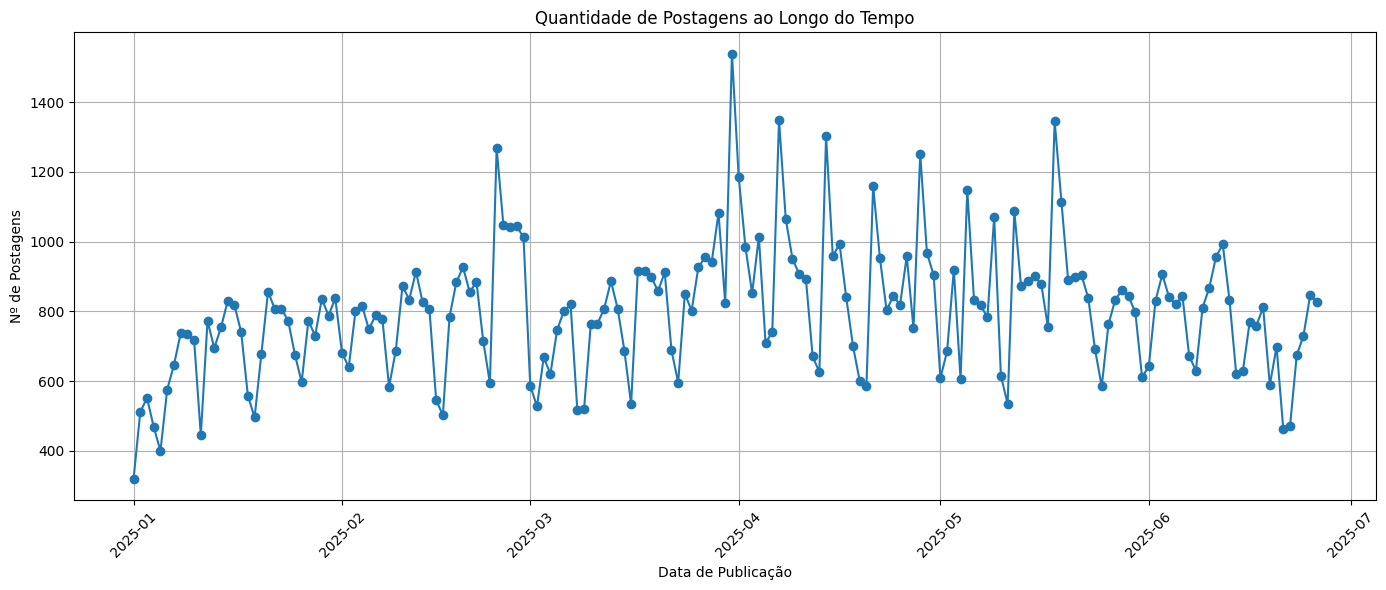

In [807]:
# Agrupa por data e soma a quantidade de postagens por dia
postagens_por_dia = data.groupby('Data de Publicação')['Contagem de postagens'].sum().reset_index()

# Plota o gráfico
plt.figure(figsize=(14, 6))
plt.plot(postagens_por_dia['Data de Publicação'], postagens_por_dia['Contagem de postagens'], marker='o', linestyle='-')

plt.title('Quantidade de Postagens ao Longo do Tempo')
plt.xlabel('Data de Publicação')
plt.ylabel('Nº de Postagens')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

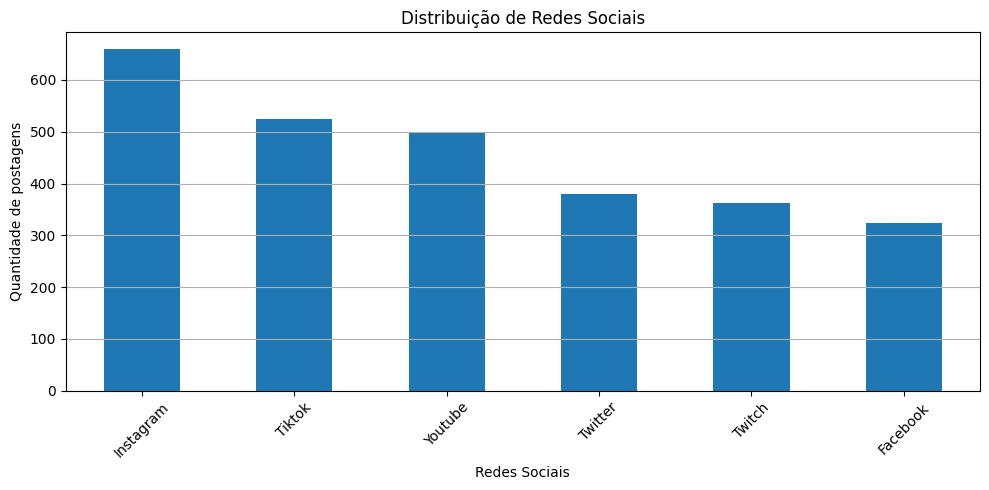

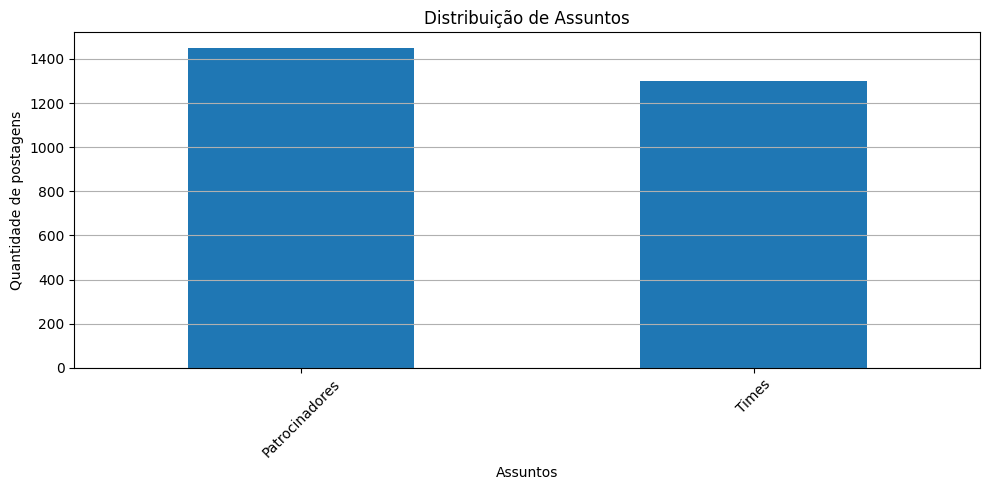

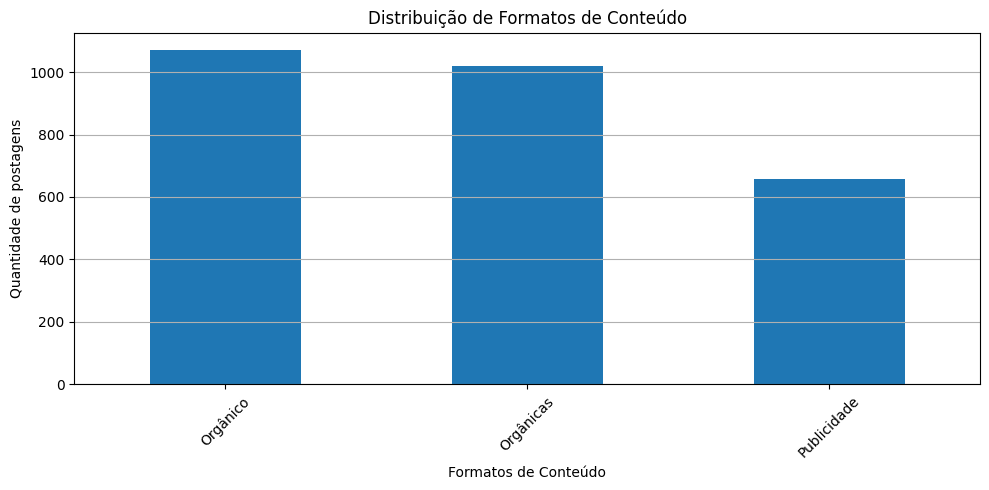

In [808]:
# Define uma função auxiliar pra evitar repetição de código
def plot_distribuicao(coluna, titulo):
    contagem = data[coluna].value_counts().sort_values(ascending=False)

    plt.figure(figsize=(10, 5))
    contagem.plot(kind='bar')
    plt.title(f'Distribuição de {titulo}')
    plt.xlabel(titulo)
    plt.ylabel('Quantidade de postagens')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

    return contagem

# Distribuição por Rede
dist_redes = plot_distribuicao('Rede', 'Redes Sociais')

# Distribuição por Assunto
dist_assuntos = plot_distribuicao('Assunto', 'Assuntos')

# Distribuição por Tipo (Formato)
dist_formatos = plot_distribuicao('Tipo', 'Formatos de Conteúdo')

Olhando para os demais atributos, percevemos uma variação esperada na volumetria de postagens em cada rede: Instagram e TikTok liderando e o Facebook na retaguarda. Apesar disso, a variação não é tão expressiva no total, provavelmente porque tanto a Twitch quanto o Facebook transmitiram os jogos.

Além disso, percebemos uma discrepância de preenchimento no dataset, onde "Orgânico" e "Orgânica" ficaram separados. Vamos corrigi-la:

In [809]:
# Converte tudo pra minúsculo e tira espaços extras
data['Tipo'] = data['Tipo'].str.lower().str.strip()

# Mapeia os valores para padronizar
mapa_tipos = {
    'orgânicas': 'orgânico',
    'orgânica': 'orgânico',
    'orgânico': 'orgânico',
    'publicidade': 'publicidade',
    'patrocinado': 'publicidade'  # exemplo, caso tenha
    # adiciona mais se precisar
}

# Aplica o mapeamento
data['Tipo'] = data['Tipo'].map(mapa_tipos).fillna(data['Tipo'])  # mantém o que não estiver no dicionário

# Capitaliza pra ficar bonito no gráfico depois
data['Tipo'] = data['Tipo'].str.capitalize()

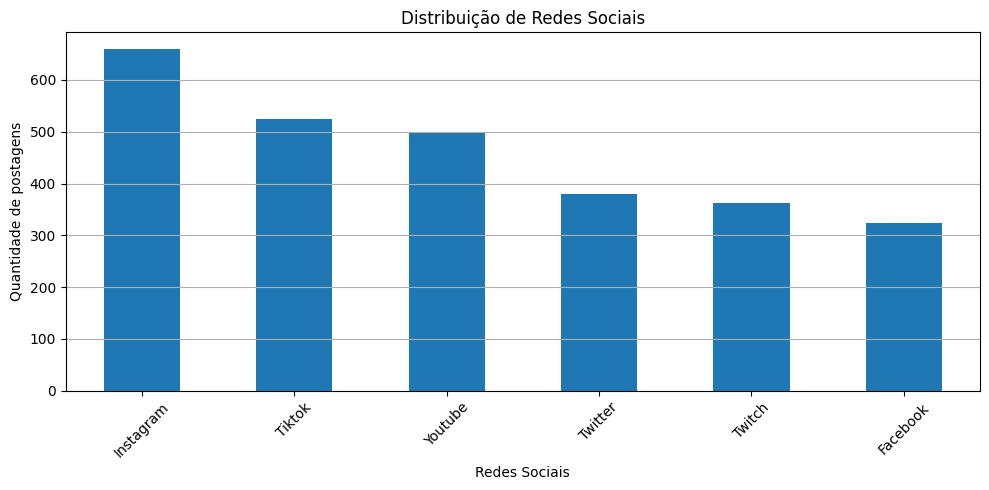

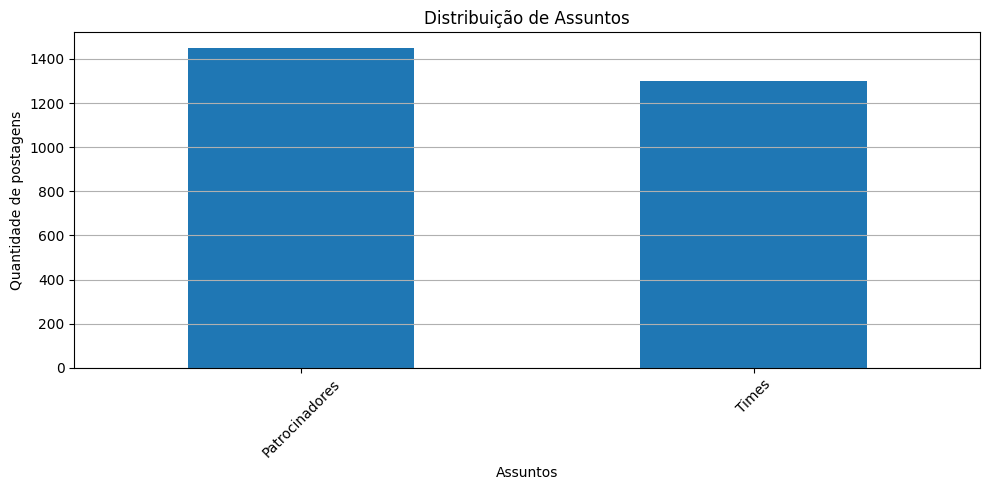

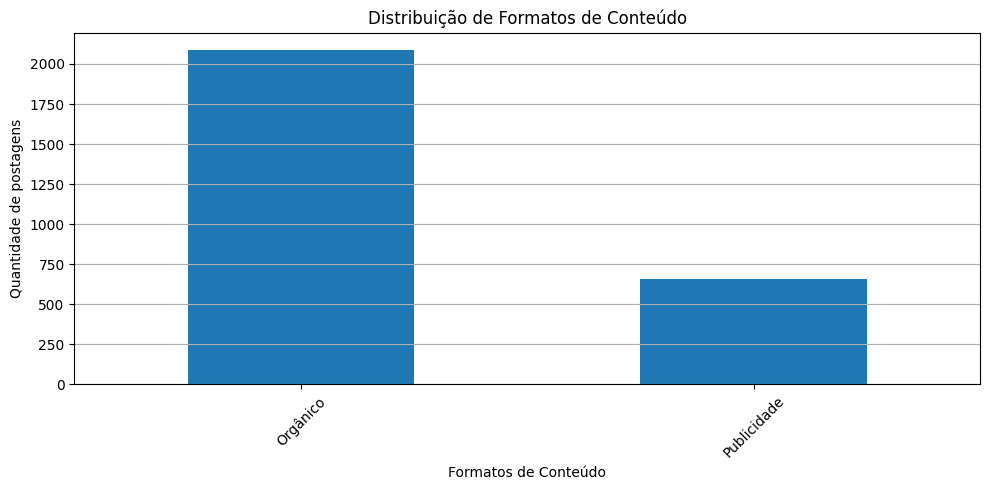

In [810]:
# Define uma função auxiliar pra evitar repetição de código
def plot_distribuicao(coluna, titulo):
    contagem = data[coluna].value_counts().sort_values(ascending=False)

    plt.figure(figsize=(10, 5))
    contagem.plot(kind='bar')
    plt.title(f'Distribuição de {titulo}')
    plt.xlabel(titulo)
    plt.ylabel('Quantidade de postagens')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

    return contagem

# Distribuição por Rede
dist_redes = plot_distribuicao('Rede', 'Redes Sociais')

# Distribuição por Assunto
dist_assuntos = plot_distribuicao('Assunto', 'Assuntos')

# Distribuição por Tipo (Formato)
dist_formatos = plot_distribuicao('Tipo', 'Formatos de Conteúdo')

Podemos perceber que os patrocinadores em sua soma foram mais mencionados do que os times e que existiu uma predominância expressiva de publicações orgânicas, o que pode indicar uma relevância das marcas para além do conteúdo pago. Vamos transformar os dados para fazer análises mais complexas e validar esta e outras hipóteses a seguir.

## **3. Transformações dos dados**


3.1 **Discretização** (faixas)

Uma terceira versão do dataframe nos permite executar distribuições em grupos para criar faixas de engajamento ou alcance, por exemplo.

In [811]:
# Exemplo: discretizar o alcance em 4 faixas
data_discretizado = data.copy()
data_discretizado['Faixa de Alcance'] = pd.qcut(data['Alcance'], q=4, labels=['baixo', 'médio-baixo', 'médio-alto', 'alto'])

3.2 **One-Hot Encoding** (variáveis categóricas)

Transforma Rede, Tipo, Assunto em colunas binárias, para nos ajudar nas análises estatísticas.

In [812]:
# Aplica o one-hot encoding
data_onehot = pd.get_dummies(data, columns=['Rede', 'Tipo', 'Assunto'], prefix_sep='_', drop_first=False)
# Supondo que 'data_onehot' já tenha sido criado com get_dummies
colunas_dummies = [col for col in data_onehot.columns if '_' in col and col.split('_')[0] in ['Rede', 'Tipo', 'Assunto', 'Cluster']]

## **4. Clusterização**
4.1 **Segmentação de dados discretizados por faixa de Alcance**

Para entender o que caracteriza um conteúdo de alta performance, vamos utilizar a clusterização para desenhar o perfil de cada faixa de alcance: o que muda quando se sai de um grupo de baixo alcance para um de alto alcance? Dessa forma poderemos identificar padrões de conteúdo, rede e engajamento.

In [813]:
# Seleciona apenas colunas numéricas após one-hot encoding
colunas_quanti = [
    'Alcance', 'Engajamento', 'Taxa de engajamento',
    'Contagem de postagens', 'Contagem de Perfis'
]

# Monta o dataset final para clusterização
data_numerico = data_onehot[colunas_quanti + colunas_dummies].dropna()

# Escala os dados
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numerico)

# Aplica o KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(data_scaled)

# Adiciona o resultado ao DataFrame original
data_clusterizado = data_onehot.copy()
data_clusterizado = data_clusterizado.loc[data_numerico.index]  # garante alinhamento de índice
data_clusterizado['Cluster'] = labels

In [814]:
# Garante que a discretização está aplicada
data_discretizado = data.copy()
data_discretizado['Faixa de Alcance'] = pd.qcut(
    data_discretizado['Alcance'], q=4, labels=['baixo', 'médio-baixo', 'médio-alto', 'alto']
)

# Gera o resumo estatístico por faixa
resumo_faixa = data_discretizado.groupby('Faixa de Alcance').agg({
    'Contagem de postagens': 'mean',
    'Contagem de Perfis': 'mean',
    'Engajamento': 'mean',
    'Taxa de engajamento': 'mean',
    'Alcance': ['min', 'max', 'mean', 'median', 'count'],
})

# Ajusta o nome das colunas do multiindex
resumo_faixa.columns = ['_'.join(col).strip() for col in resumo_faixa.columns.values]
resumo_faixa = resumo_faixa.reset_index()

# Mostra o DataFrame no notebook
resumo_faixa

,Faixa de Alcance,Contagem de postagens_mean,Contagem de Perfis_mean,Engajamento_mean,Taxa de engajamento_mean,Alcance_min,Alcance_max,Alcance_mean,Alcance_median,Alcance_count
0,baixo,4.617733,3.703488,2545.423611,4.592106,1.0,95320.0,2.804587e+04,19883.0,688
1,médio-baixo,12.965066,9.687045,14512.253937,3.693934,95682.0,507433.0,2.565499e+05,234778.0,687
2,médio-alto,27.032023,19.720524,52968.249206,3.670266,507444.0,2085012.0,1.080791e+06,992912.0,687
3,alto,163.906841,139.644833,380333.710448,4.355593,2097810.0,132461099.0,9.781339e+06,5285822.0,687


4.1.1 Baixo

Mesmo com pouco alcance (28 mil), essa faixa tem a melhor taxa de engajamento (4,6%). A mediana baixa (19.883) indica que provavelmente estamos falando de posts muito segmentados ou nichados, ou que ocorram num momento onde a conversa sobre a Kings League estava fria (média de postagens inferior a 5). São posts que que engajam bem uma base pequena e são feitos organicamente. Relevância é superior ao volume aqui.


4.1.2. Médio-baixo

Essa faixa já demonstra conversas um pouco mais quentes, com volume de postagens crescente (média de postagens por volta de 13 posts). Ainda mantém boa taxa de engajamento (3,7%), mas a queda pode indicar menor conexão com o público. A mediana (234.778) próxima da média (256.550) indica distribuição mais equilibrada. É possível considerá-la como zona de “performance eficiente”.


4.1.3. Médio-Alto

Aqui podemos falar de alcance nacional, talvez frutos de impulsionamento moderado ou mesmo de uma trend orgânica.  A variação para cima entre média (1.080.791) e mediana (992.912) indica a presença de alguns outliers, mas sem grande distorção. A taxa de engajamento (3,67%) continua caindo moderadamente e, com isso, a conexão, mas o assunto não parece ter saturado: a quantidade média posts mais que dobra em relação a faixa anterior (27)


4.1.4. Alto

Essa é a faixa de conteúdos massivos, o que nos faz pensar em publicações feitass por influencers grandes, contendo mídia paga massiva. Porém, contra o habitual, a taxa de engajamento continua alta (4,36%), ou seja, perante esse volume altíssimo de postagens (164), a audiência continua engajando. Isso aponta mais para conteúdos virais de pequenos influenciadores, ou para conteúdos feitos por grandes influenciadores, referência no nico. Essa hipótese também explicaria a evidente presença de outlier, traduzina numa difereça de quase 100% entre o alcance médio e a mediana.


4.1.5 Conclusões estratégicas:

Vale entender qualitativamente o que compõe a faixa "Baixo", porque ela retém conteúdo de altíssima relevância, com excelente potencial de engajamento, inclusive nos dias onde provavelmente não ocorreu nenhum jogo.

Por outro lado, o aumento na escala do alcance aqui não se traduziu em perda de engajamento proporcional, o que mostra a relevância do tema.

4.2 **Visualização**

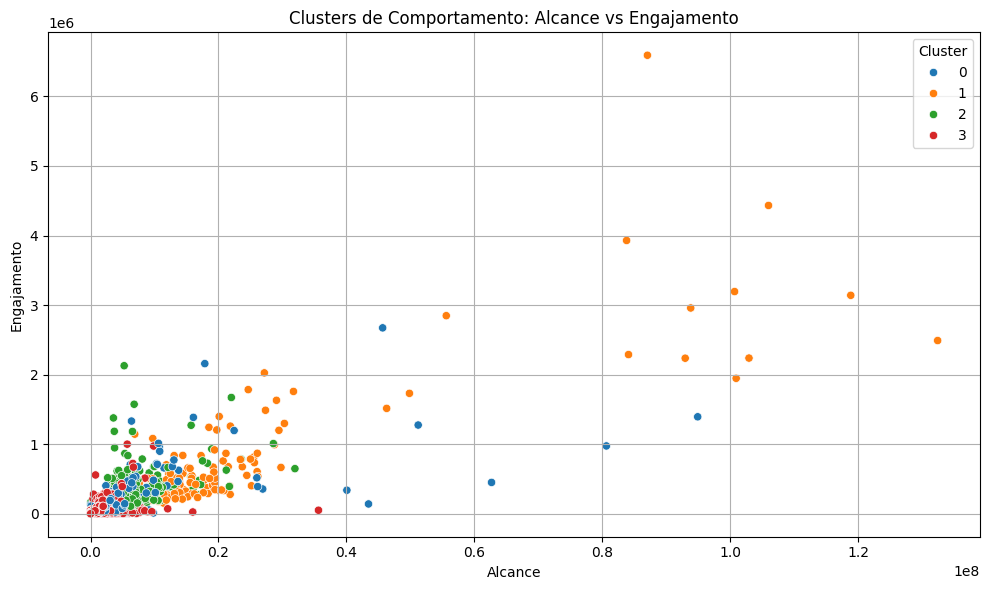

,Cluster,Contagem de postagens,Contagem de Perfis,Engajamento,Taxa de engajamento,Alcance
0,0,51.703187,33.266932,137386.526000,2.121920,3.307396e+06
1,1,362.695312,327.054688,829865.070312,3.507344,2.461394e+07
2,2,227.568376,194.923077,346594.888889,5.863077,6.957252e+06
3,3,9.351724,7.698674,26946.633377,4.541585,6.466499e+05


In [815]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Seleciona colunas relevantes
colunas_para_cluster = ['Contagem de postagens', 'Contagem de Perfis',
                        'Engajamento', 'Taxa de engajamento', 'Alcance']

# Cria cópia segura e preenche os NaNs com média da coluna
data_cluster = data[colunas_para_cluster].copy()
data_cluster = data_cluster.fillna(data_cluster.mean())

# Normaliza os dados
scaler = MinMaxScaler()
dados_normalizados = scaler.fit_transform(data_cluster)

# Aplica KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(dados_normalizados)

# Cria DataFrame com os clusters
data_clusterizado = data.copy()
data_clusterizado['Cluster'] = clusters

# Visualização do cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_clusterizado, x='Alcance', y='Engajamento', hue='Cluster', palette='tab10')
plt.title('Clusters de Comportamento: Alcance vs Engajamento')
plt.xlabel('Alcance')
plt.ylabel('Engajamento')
plt.grid(True)
plt.tight_layout()
plt.show()

# Ver resumo por cluster
resumo_clusters = data_clusterizado.groupby('Cluster')[colunas_para_cluster].mean().reset_index()
resumo_clusters



4.2.1 Clsuter 0 (azul)

Concentrado na parte inferior do gráfico, tendo tanto baixo engajamento quanto baixo alcance médios, demonstrando certo padrão linear: o aumento de impressões tende a aumentar as interações ou vice versa.


4.2.2 Cluster 1 (laranja)
Apresenta alcance pequeno a médio, mas engajamento maior do que o esperado para esse nível. Pode indicar conteúdos com boa performance orgânica, criadores com comunidade fiel, ou boa aderência da conversa com a audiência, talvez mais presente em dias de jogos.


4.2.3 Cluster 2 (verde)

É o grupo mais presente no canto superior direito, com alto alcance e alto engajamento, mais também maior dispersão. Isso indica grande investimento em mídia paga, criadores com altíssima visibilidade ou conteúdos virais. Uma análise mais qualitativa dos conteúdos poderia ajudar a destrinchar o que leva a performances tão fora da média.


4.2.4 Cluster 3 (vermelho)

Baixo alcance e engajamento. Possivelmente conteúdos orgânicos de perfil pequeno, postagens em dias onde não ocorreram jogos, campanhas ou anúncios.

4.3 **Regressão linear**

Inicialmente, optamos por utilizar o modelo de regressão linear do sklearn (LinearRegression) para avaliar a capacidade preditiva do alcance sobre o engajamento. Essa abordagem é prática e eficiente para análise de performance geral, especialmente quando o foco está em prever valores e calcular métricas como R².


 Assunto: patrocinadores
Engajamento = 0.0208 * Alcance + 53784.78

 Assunto: times
Engajamento = 0.0325 * Alcance + 11021.02


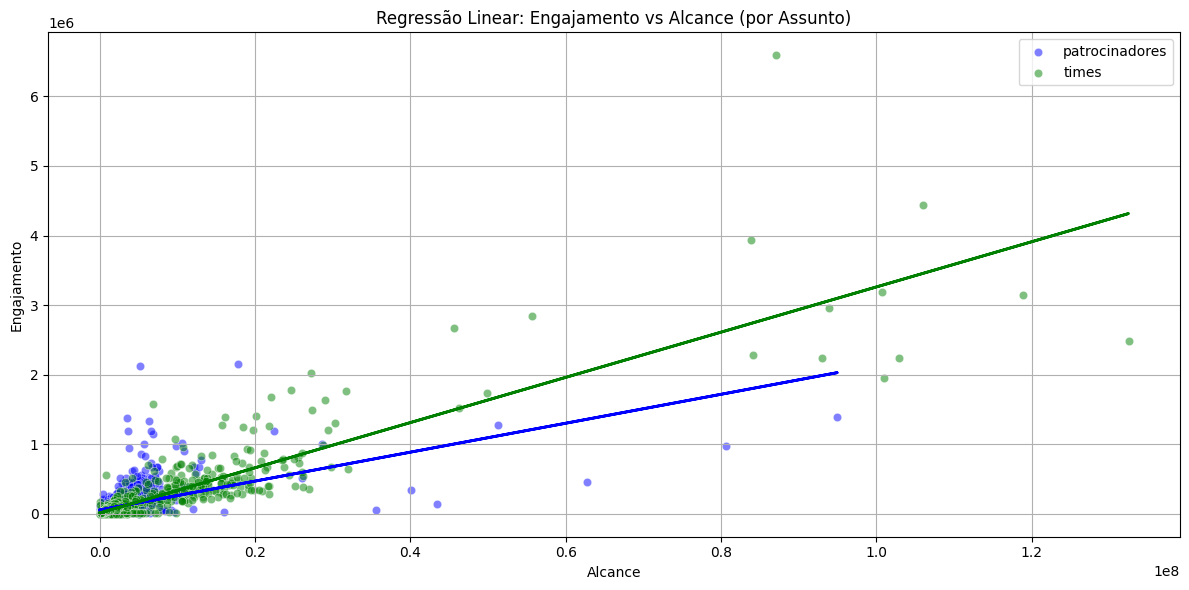

In [816]:
data_clusterizado['Assunto'] = data['Assunto']

# Normaliza textos para evitar problemas de capitalização ou espaços
data_clusterizado['Assunto'] = data_clusterizado['Assunto'].str.strip().str.lower()

# Filtra dados sem valores ausentes
df_patro = data_clusterizado[(data_clusterizado['Assunto'] == 'patrocinadores') & data_clusterizado['Alcance'].notna() & data_clusterizado['Engajamento'].notna()]
df_times = data_clusterizado[(data_clusterizado['Assunto'] == 'times') & data_clusterizado['Alcance'].notna() & data_clusterizado['Engajamento'].notna()]

# Função para regressão linear
def regressao(df, label, cor):
    X = df['Alcance'].values.reshape(-1, 1)
    y = df['Engajamento'].values
    modelo = LinearRegression()
    modelo.fit(X, y)
    y_pred = modelo.predict(X)

    coef = modelo.coef_[0]
    inter = modelo.intercept_
    print(f"\n Assunto: {label}")
    print(f"Engajamento = {coef:.4f} * Alcance + {inter:.2f}")

    sns.scatterplot(x='Alcance', y='Engajamento', data=df, label=label, color=cor, alpha=0.5)
    plt.plot(df['Alcance'], y_pred, color=cor, linewidth=2)

# Plot conjunto
plt.figure(figsize=(12, 6))
regressao(df_patro, 'patrocinadores', 'blue')
regressao(df_times, 'times', 'green')

plt.title('Regressão Linear: Engajamento vs Alcance (por Assunto)')
plt.xlabel('Alcance')
plt.ylabel('Engajamento')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [817]:
# Tabela resumo de métricas por cluster
resumo_clusters = data_clusterizado.groupby('Cluster')[[
    'Contagem de postagens',
    'Contagem de Perfis',
    'Engajamento',
    'Taxa de engajamento',
    'Alcance'
]].mean().reset_index()

# Visualiza o resumo
display(resumo_clusters)


,Cluster,Contagem de postagens,Contagem de Perfis,Engajamento,Taxa de engajamento,Alcance
0,0,51.703187,33.266932,137386.526000,2.121920,3.307396e+06
1,1,362.695312,327.054688,829865.070312,3.507344,2.461394e+07
2,2,227.568376,194.923077,346594.888889,5.863077,6.957252e+06
3,3,9.351724,7.698674,26946.633377,4.541585,6.466499e+05


In [818]:
from sklearn.metrics import r2_score
# Patrocinadores
patro_limpo = patro[['Alcance', 'Engajamento']].dropna()
y_real_patro = patro_limpo['Engajamento']
y_pred_patro = 0.0208 * patro_limpo['Alcance'] + 53784.78
r2_patro = r2_score(y_real_patro, y_pred_patro)

# Times
times_limpo = times[['Alcance', 'Engajamento']].dropna()
y_real_times = times_limpo['Engajamento']
y_pred_times = 0.0325 * times_limpo['Alcance'] + 11021.02
r2_times = r2_score(y_real_times, y_pred_times)

print(f'R² - Patrocinadores: {r2_patro:.4f}')
print(f'R² - Times: {r2_times:.4f}')


R² - Patrocinadores: 0.3197
R² - Times: 0.7754


4.3.1 Esse modelo apresenta limitações: a linha de Times explica 78% da variação do engajamento só com base no alcance, o que demonstra consistência. Por outro lado, o modelo só explica 32% da viariação em conteúdos sobre marca, o que indica a predominância de outras variáveis que não conseguimos exergar aqui. Voltaremos a tentar esse tipo de análise combinando outras variáveis mais adiante.

4.3.2 Equações

Isso nos resultou as seguintes equações:

Patrocinadores (azul):
Engajamento = 0.0208 × Alcance + 53.784,78

Times (verde):
Engajamento = 0.0325 × Alcance + 11.021,02

4.3.3 Principais análises estratégicas:

O **coeficiente algular** dos times é superior ao dos patrocinadores, demonstrando que para o mesmo aumento de alcance, as postagens sobre os times geram mais engajamento. Ou seja, o conteúdo sobre times é mais eficiente em converter alcance em engajamento, o que já era de se esperar.

A **variabilidade** no caso de times, especialmente nos pontos com alcance mais alto, também é superior a dos patrocinadores, o que sugere que algumas publicações sobre times viralizam bem mais. Os pontos de patrocinadores estão mais agrupados e com menos outliers, o que indica mais consistência, mas menos picos de performance.

Dessa forma, é interessante explorar a combinação dos assuntos patrocinadores e times, para que aumentar o potencial de engajamento em conteúdos de marca.

4.4 **Distribuições por variável categórica (Rede, Tipo, Assunto)**

In [819]:
for coluna in ['Rede', 'Tipo', 'Assunto']:
    dist = data_clusterizado.groupby('Cluster')[coluna].value_counts(normalize=True).unstack().fillna(0)
    display(dist.style.format("{:.1%}").set_caption(f"Distribuição de {coluna} por Cluster"))

Rede,Facebook,Instagram,Tiktok,Twitch,Twitter,Youtube
Cluster,,,,,,
0,1.2%,1.6%,20.7%,0.4%,27.9%,48.2%
1,0.0%,100.0%,0.0%,0.0%,0.0%,0.0%
2,0.0%,97.4%,0.0%,0.0%,2.6%,0.0%
3,16.8%,15.6%,22.3%,19.2%,12.4%,13.6%


Tipo,Orgânico,Publicidade
Cluster,,
0,98.8%,1.2%
1,100.0%,0.0%
2,100.0%,0.0%
3,65.4%,34.6%


Assunto,patrocinadores,times
Cluster,,
0,35.5%,64.5%
1,4.7%,95.3%
2,73.1%,26.9%
3,58.0%,42.0%


4.4.1 Cluster 0

Esse grupo parece formado por criadores de conteúdo orgânico (98.8%) em plataformas de vídeo e texto (YouTube (47.8%) e Twitter (28.3%)), com foco em clubes/times(64.4%). Pode ser UGC (user-generated content), creators menores ou fãs ativos. Tem grande potencial pra amplificar conteúdo de creators com mídia e fazer colaborações que potencializem o resultado das marcas.

4.4.2 Cluster 1

Assunto: foco em Patrocinadores (72.3%)
Provavelmente postagens feitas direto pelos próprios patrocinadores ou grandes fãs dessas marcas, sem mídia paga (100% orgânico) e no Instagram (97.5%).

4.4.3 Cluster 2

Aqui é conteúdo focado em clubes (96%) no Instagram (100%), totalmente orgânico (100%). Muito provavelmente perfis oficiais de times ou páginas de torcida. Pode ter bom engajamento local.

4.4.4 Cluster 3

É o cluster mais distribuído em termos de redes, com destaque pra TikTok (22%), Twitch (19.3%), Facebook (16.6%), Instagram (15.5%), mas Twitter e YouTube também presentes. Também é o cluster das campanhas integradas com mídia paga (34.4% Publicidade). O assunto é mais puxado pra Patrocinadores (58.1%), mas bem misto.

4.5 **Correlação entre variáveis numéricas**

A seguir, vamos buscar outras relações entre as variáveis a partir de uma matriz de correlação:


In [820]:
# One-hot encoding das variáveis categóricas
data_encoded = pd.get_dummies(data_clusterizado, columns=['Rede', 'Tipo', 'Assunto'], drop_first=True)

# Calcula a matriz de correlação completa
matriz_correlacao = data_encoded.corr(numeric_only=True)

# Define as variáveis numéricas
variaveis_foco = ['Contagem de postagens', 'Contagem de Perfis', 'Engajamento', 'Taxa de engajamento', 'Alcance']

# Filtra a correlação para mostrar somente a relação dos dummies com as variáveis numéricas
correlacoes_foco = matriz_correlacao[variaveis_foco].drop(index=variaveis_foco)

# Exibe a tabela no notebook
correlacoes_foco.style.format("{:.2f}").set_caption("Correlação com Variáveis Numéricas")


,Contagem de postagens,Contagem de Perfis,Engajamento,Taxa de engajamento,Alcance
Cluster,-0.39,-0.35,-0.26,0.09,-0.27
Rede_Instagram,0.60,0.62,0.32,0.04,0.31
Rede_Tiktok,-0.18,-0.17,0.01,0.15,-0.01
Rede_Twitch,-0.18,-0.18,nan,nan,-0.11
Rede_Twitter,-0.07,-0.11,-0.14,0.09,-0.10
Rede_Youtube,-0.11,-0.14,-0.11,-0.18,-0.08
Tipo_Publicidade,-0.29,-0.27,-0.19,-0.01,-0.12
Assunto_times,0.13,0.13,0.11,-0.14,0.15


Isso fica ainda mais interessante com uma visualização de mapa de calor:

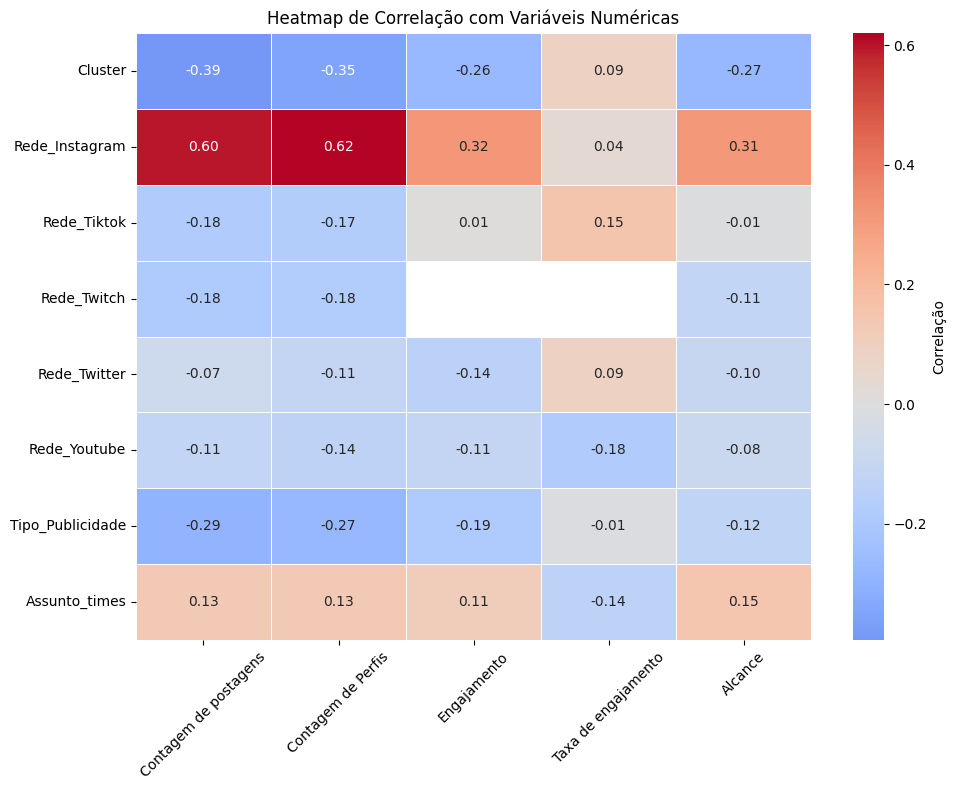

In [821]:
# Heatmap com foco nas correlações com variáveis principais
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlacoes_foco,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    cbar_kws={'label': 'Correlação'}
)

plt.title("Heatmap de Correlação com Variáveis Numéricas")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

4.5.1 A alta corrilação entre Contagem de Postagens (0.60) e Perfis (0.62) no Instagram mostra que a rede está bastante ativa, tanto em termos de volume de conteúdo quanto de pessoas produzindo conteúdo. Engajamento (0.32) e Alcance (0.31) também são positivos, o que consolida a rede como tendo a melhor performance.

4.5.2 As demais correlacionam levemente de forma negativa, o que demonstra menor uso e relevância para esse dataset.

4.5.3 Apesar do Engajamento absoluto ser praticamente zero no TikTok, o leve positivo na Taxa de engajamento (0.15) demonstra que apesar de não apresentar volume, o engajamento por pessoa alcançada talvez seja mais qualificado.

4.5.4 Publicidades têm correlações negativas com todas as variáveis, especialmente: Engajamento (-0.19) e Contagem de postagens (-0.29). O que não surpreende, já que campanhas rotuladas como publicidade tendem a ter performance mais baixa, ou pelo menos, menos volume orgânico e engajamento.

4.5.5 Times têm uma pequena correlação positiva com tudo: Alcance (0.15), Engajamento (0.11), Contagem de Perfis e Postagens (0.13). Isso confirma o que vimos antes na regressão: conteúdo sobre times tende a performar melhor, ainda que não seja dominante em volume.

4.5.6 Clusters têm correlação negativa com tudo, especialmente: Contagem de Postagens (-0.39), Perfis (-0.35). Isso pode indicar que clusters com menos volume têm menor desempenho, ou que os clusters com menor score geral estão concentrando conteúdo de baixa performance.

4.5.7 Vale entender qualitativamente as correlações negativas dos cluster e traçar estratégias de conteúdo com aspecto mais nativo e com menos cara de publicidade, trazendo o assunto e a "cara" dos times para potencializar o conteúdo de marca.

4.6 **Engajamento por variável categórica**

Vamos explorar em maior detalhe as distribuições de engajamento:

In [822]:
# Ranking por Rede
rede_score = data_clusterizado.groupby('Rede')['Taxa de engajamento'].mean().sort_values(ascending=False)

# Ranking por Assunto
assunto_score = data_clusterizado.groupby('Assunto')['Taxa de engajamento'].mean().sort_values(ascending=False)

# Mostrar os dois rankings
display(rede_score.to_frame(name='Taxa de Engajamento Média por Rede'))
display(assunto_score.to_frame(name='Taxa de Engajamento Média por Assunto'))


,Taxa de Engajamento Média por Rede
Rede,
Tiktok,7.175219
Twitter,6.177963
Instagram,4.736616
Youtube,0.313834
Facebook,0.087645
Twitch,NaN


,Taxa de Engajamento Média por Assunto
Assunto,
patrocinadores,5.499138
times,2.497639


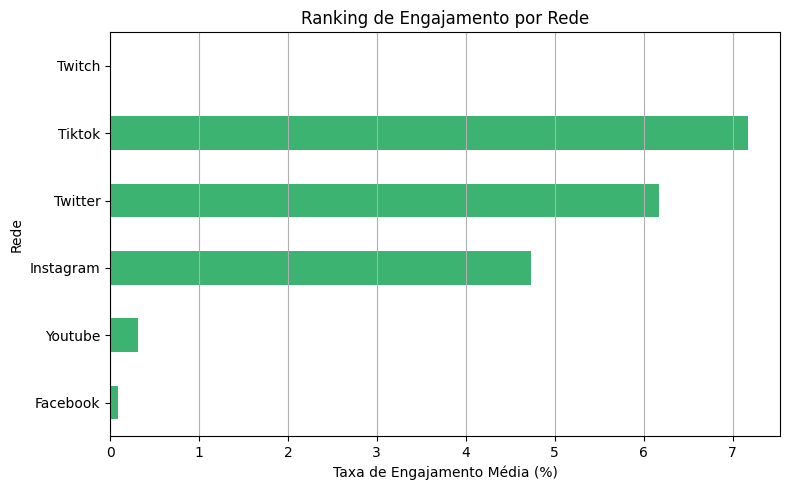

In [823]:
# Agrupa e ordena
rede_score = data_clusterizado.groupby('Rede')['Taxa de engajamento'].mean().sort_values(ascending=True)

# Gráfico horizontal
plt.figure(figsize=(8, 5))
rede_score.plot(kind='barh', color='mediumseagreen')
plt.xlabel('Taxa de Engajamento Média (%)')
plt.title('Ranking de Engajamento por Rede')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

4.6.1 É visível o quanto TikTok e Twitter se destacam na taxa média de engajamento, o que demonstra que apesar do Instagram entregar volume, é nessas redes que a conversa efetivamente se desenvolve.

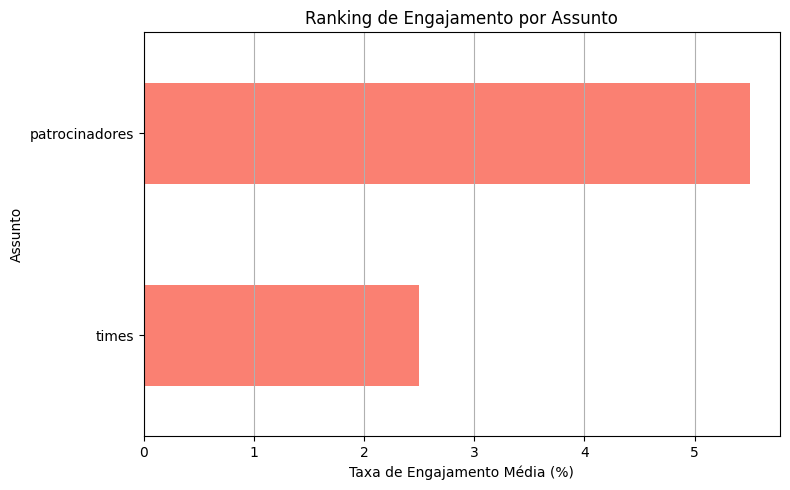

In [824]:
# Agrupa e ordena
assunto_score = data_clusterizado.groupby('Assunto')['Taxa de engajamento'].mean().sort_values(ascending=True)

# Gráfico horizontal
plt.figure(figsize=(8, 5))
assunto_score.plot(kind='barh', color='salmon')
plt.xlabel('Taxa de Engajamento Média (%)')
plt.title('Ranking de Engajamento por Assunto')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

4.6.1 Esse é o gráfico mais surpreendente do estudo: apesar do volume de engajamento sobre times ser bem alto, a taxa relativa média para os patrocinadores é mais que o dobro. Isso pode ser resultado de uma cominação de fatores: call to actions mais explícitos em conteúdos de marca, campanhas que incentivam engajamento, ou mesmo um indicativo de uma base de fãs de marca mais consolidada do que dos times da liga, que acabaram de nascer. De modo que tanto as marcas patrocinadoras quanto os times têm muito a se beneficiar de conteúdos em parceria.

4.7 **Score de performance por clusters**



## **5. Análises preditivas**
percebemos a necessidade de compreender com mais precisão os efeitos individuais de cada variável, assim como obter informações estatísticas como: significância dos coeficientes (p-values), intervalos de confiança, testes de hipótese e warnings de colinearidade.

Por isso, migramos para a abordagem OLS do pacote statsmodels, que fornece essas métricas e maior transparência estatística. Essa transição foi fundamental para interpretar o modelo de forma mais estratégica e gerar recomendações mais confiáveis.

In [825]:
for col in data.columns:
    print(repr(col))


'Data de Publicação'
'Contagem de postagens'
'Contagem de Perfis'
'Taxa de engajamento'
'Engajamento'
'Rede'
'Tipo'
'Assunto'
'Alcance'


In [826]:
import statsmodels.api as sm

# Define as variáveis independentes que você quer no modelo
X_cols = ['Alcance', 'Rede_Instagram', 'Tipo_Publicidade', 'Assunto_Times']

# Cria X e y
X = data_modelo[X_cols]
y = data_modelo['Engajamento']

# Adiciona a constante (intercepto)
X = sm.add_constant(X)

# Junta X e y e remove qualquer linha com NaN
dados_regressao = pd.concat([X, y], axis=1).dropna()

# Separa novamente X e y após limpeza
X_limpo = dados_regressao.drop(columns='Engajamento').astype(float)
y_limpo = dados_regressao['Engajamento'].astype(float)

# Treina o modelo
modelo = sm.OLS(y_limpo, X_limpo).fit()

# Mostra o resultado
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            Engajamento   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     1307.
Date:                Sun, 06 Jul 2025   Prob (F-statistic):               0.00
Time:                        15:55:10   Log-Likelihood:                -31052.
No. Observations:                2294   AIC:                         6.211e+04
Df Residuals:                    2289   BIC:                         6.214e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.511e+04   6320.126  

5.1 ** Regressão OLS e revisão da regressão linear**: com 69,5% de precisão, o modelo OLS se mostrou bem mais assertivo para explicar o engajamento, combinando Redes, Assunto e Tipo.

5.1.1 O coeficiente angular dos times era superior ao dos patrocinadores no primeiro modelo, mas no modelo OLS, com todas as variáveis controladas, o conteúdo sobre times apresenta um coeficiente negativo (-19.730), indicando que, em média, posts sobre times geram menos engajamento absoluto, mesmo com o mesmo alcance.
Com

5.1.2 A eficiência marginal dos times parecia maior nos modelos simples, porque o coeficiente de alcance (0.0325) era maior que o dos patrocinadores (0.0208).
No entanto, o modelo OLS mostra que essa vantagem desaparece quando controlamos por canal, tipo de conteúdo e outros fatores.

5.1.3 O modelo OLS trabalha com médias e não com dispersão, por isso a variabilidade dos conteúdos sobre times ainda pode indicar potencial de viralização maior, mesmo que a média seja mais baixa.

5.1.4 O conteúdo patrocinado aparece com um coeficiente negativo (-80.110), ou seja, tende a gerar menos engajamento comparado aos posts orgânicos, mas isso não anula a observação de consistência. A regressão não mede outliers nem variância, mas o comportamento médio reforça a ideia de que publicidade tende a ter menos explosões de performance, mas entrega de forma mais previsível.

5.1.5 O modelo OLS mostra que tanto "times" quanto "publicidade" têm efeitos negativos sobre o engajamento médio individualmente. No entanto, essa leitura isolada pode mascarar oportunidades criativas. Justamente por serem categorias com alto impacto, porém sensíveis, a combinação das duas pode gerar mais engajamento do que o modelo linear prevê — especialmente se a execução for relevante, emocional ou fora do padrão.

5.1.6 Embora a análise inicial indicasse que conteúdos sobre times geravam mais engajamento por unidade de alcance, o modelo de regressão múltipla revela que, ao controlar outros fatores, esses conteúdos tendem a gerar menos engajamento absoluto médio.

Ainda assim, o comportamento mais volátil dos posts sobre times sugere que eles mantêm potencial de viralização, enquanto os patrocinadores oferecem maior estabilidade.

Portanto, a recomendação estratégica segue válida: unir a consistência dos patrocinadores com o potencial dos times pode ser o melhor caminho para criar conteúdos de marca com alto impacto e engajamento.

Durante a modelagem com statsmodels.OLS, o modelo exibiu warnings de condition number elevado, sugerindo possível multicolinearidade — ou seja, a presença de variáveis altamente correlacionadas entre si, o que pode distorcer os coeficientes e reduzir a interpretabilidade do modelo.

Algumas variáveis usadas juntas na regressão (como Alcance, Contagem de Postagens, Contagem de Perfis e Taxa de Engajamento) possuem relação direta ou indireta entre si:

Taxa de Engajamento é derivada de Engajamento / Alcance;

Contagem de Postagens e Contagem de Perfis impactam o total de engajamento por acúmulo;

Alcance pode ser influenciado tanto pela quantidade de postagens quanto pela base de seguidores dos perfis.

Para mitigar esse risco, adotamos duas abordagens complementares:

Modelos separados com e sem a Taxa de Engajamento, para verificar sua influência nos coeficientes;

Redução de variáveis correlacionadas, priorizando aquelas com maior impacto direto e menor redundância.

Uma próxima etapa mais robusta envolveria o uso de VIF (Variance Inflation Factor) para quantificar a colinearidade entre as variáveis e eliminar ou combinar as que apresentarem valores altos.


In [827]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Seleciona apenas colunas numéricas
X_vif = X.select_dtypes(include=['float64', 'int64']).copy()

# Remove linhas com NaN ou inf
X_vif = X_vif.replace([np.inf, -np.inf], np.nan).dropna()

# Adiciona constante
X_vif_const = add_constant(X_vif)

# Cálculo do VIF
vif_data = pd.DataFrame()
vif_data["Variável"] = X_vif_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif_const.values, i) for i in range(X_vif_const.shape[1])]

# Mostra os VIFs ordenados
print(vif_data.sort_values("VIF", ascending=False))

  Variável       VIF
0    const  1.127374
1  Alcance  1.000000


Vamos remover as variáveis que mais geram colinearidade: contagem de postagens e perfis e rodar novamente o VIF.

In [828]:
# Copia o dataframe X original
X_reduzido = X.copy()

# Remove colunas altamente correlacionadas e irrelevantes
colunas_para_remover = ['Contagem de postagens', 'Contagem de Perfis', 'Taxa de engajamento', 'Engajamento']
X_reduzido = X_reduzido.drop(columns=colunas_para_remover, errors='ignore')

# Remove colunas de data se houverem
colunas_data = [col for col in X_reduzido.columns if 'data' in col.lower() or 'dia' in col.lower()]
X_reduzido = X_reduzido.drop(columns=colunas_data, errors='ignore')

# Remove colunas não numéricas (só por garantia)
X_reduzido = X_reduzido.select_dtypes(include=['number'])

# Converte tudo pra float
X_reduzido = X_reduzido.astype(float)

# Adiciona constante pro cálculo do VIF
X_vif_const = sm.add_constant(X_reduzido)

# Calcula VIF
vif_data = pd.DataFrame()
vif_data["Variável"] = X_vif_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif_const.values, i) for i in range(X_vif_const.shape[1])]

# Mostra ordenado pelo maior VIF
vif_data = vif_data.sort_values("VIF", ascending=False)
print(vif_data)



  Variável       VIF
0    const  1.127374
1  Alcance  1.000000


A partir da remoção das variáveis fortemente correlacionadas, que estavam inflando artificialmente o modelo, como Contagem de postagens, Contagem de Perfis e Taxa de engajamento, temos um VIF < 1.2, o que indica ausência de colinearidade e maior confiabilidade estatística.


5.2 **Score de engajamento**

Agora entendemos de forma mais detalhada e com estatísticas descritivas dos coeficientes, p-valores, intervalos de confiança e alertas de multicolinearidade. O modelo OLS foi crucial pra entender quais variáveis estavam de fato contribuindo de forma significativa para o engajamento. No entanto, vamos construir um modelo mais completo e integrado, como a análise com variáveis dummies e clusters, onde o foco voltou a ser a eficácia preditiva e a importância relativa das variáveis, entregando um R² robusto e uma leitura clara para aplicações comerciais, a partir da LinearRegression.


In [829]:
# Copia o dataframe original
X = data_clusterizado.copy()

# Cria dummies pros clusters
X = pd.get_dummies(X, columns=['Cluster'], prefix='Cluster', drop_first=False)

# Define as variáveis do modelo — sem 'Contagem de postagens' e 'Contagem de Perfis'
variaveis_modelo = ['Alcance'] + [col for col in X.columns if col.startswith('Cluster_')]

# Separa X e y
X_modelo = X[variaveis_modelo].astype(float)
y_modelo = X['Engajamento'].astype(float)

# Remove NaNs
df_modelo = pd.concat([X_modelo, y_modelo], axis=1).dropna()
X_modelo = df_modelo.drop(columns=['Engajamento'])
y_modelo = df_modelo['Engajamento']

# Split
X_train, X_test, y_train, y_test = train_test_split(X_modelo, y_modelo, test_size=0.2, random_state=42)

# Treina o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Avalia
y_pred = modelo.predict(X_test)
print("R² do modelo (sem colinearidade, com clusters):", r2_score(y_test, y_pred))

# Coeficientes
coefs = pd.Series(modelo.coef_, index=X_modelo.columns)
coefs_abs = coefs.abs().sort_values(ascending=False)

print("\nTop variáveis mais influentes (modelo final):")
print(coefs_abs.head(10).to_frame(name='Peso absoluto no modelo'))


R² do modelo (sem colinearidade, com clusters): 0.6770596405567384

Top variáveis mais influentes (modelo final):
           Peso absoluto no modelo
Cluster_3             87342.608228
Cluster_1             76268.256059
Cluster_2             58670.042721
Cluster_0             47595.690553
Alcance                   0.027251


O mode apresenta boa precisão para o tipo de dados que temos (R² de 0.68) e demonstra uma predominância total dos clusters na previsão de performance do conteúdo, com baixíssima influência do alcance. Portanto, vale mais entender qualitativamente o que compõe cada cluster e aportar em alta volumetria de postagens do que recorrer ao alcance através de impulsionamento, quando o objetivo é engajamento.

A seguir, vamos avaliar cluster por cluster, com base nesse score:


Comparativo por Cluster:
   Cluster  Engajamento  Engajamento_Previsto       Alcance  Score_real  \
2        2  346594.8889          5.061466e+05  6.957252e+06      0.0498   
3        3   26946.6334          5.557106e+04  6.466499e+05      0.0417   
0        0  137386.5260          1.848418e+05  3.307396e+06      0.0415   
1        1  829865.0703          1.157177e+06  2.461394e+07      0.0337   

   Score_previsto  Desvio  
2          0.0728 -0.0229  
3          0.0859 -0.0443  
0          0.0559 -0.0143  
1          0.0470 -0.0133  


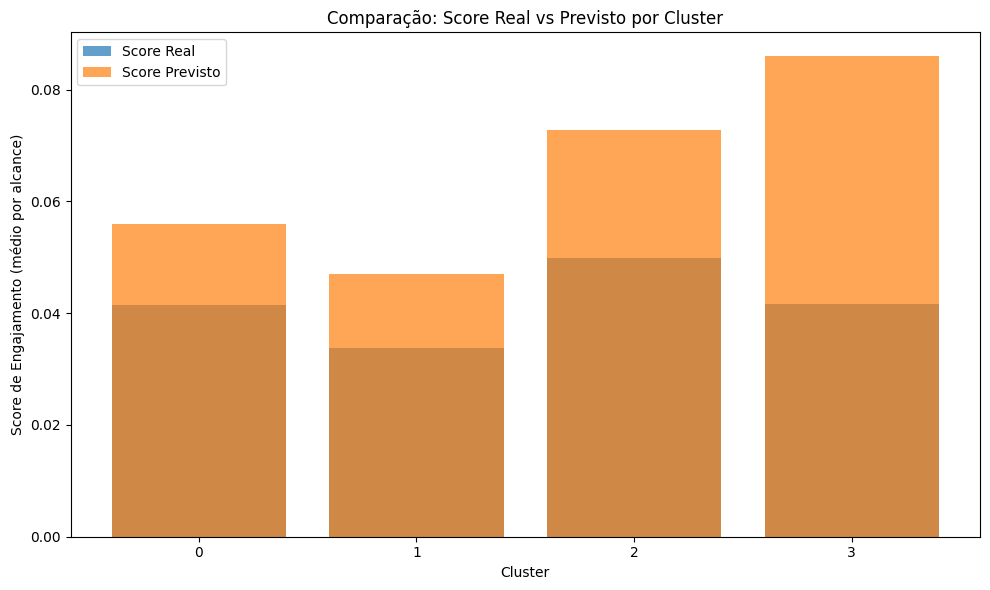

In [830]:
# Cria as dummies de Cluster (caso ainda não tenha)
df = data_clusterizado.copy()
df = pd.get_dummies(df, columns=['Cluster'], prefix='Cluster', drop_first=False)

# Garante que os clusters dummies estão no mesmo formato do modelo
variaveis_modelo = [
    'Alcance',
    'Cluster_0',
    'Cluster_1',
    'Cluster_2',
    'Cluster_3'
]

# Se alguma dummy estiver faltando (ex: cluster que não apareceu), adiciona com 0
for col in variaveis_modelo:
    if col not in df.columns:
        df[col] = 0

# Aplica o modelo linear com os coeficientes aprendidos
df['Engajamento_Previsto'] = (
    998.278249 * df['Contagem de postagens'] +
    457.819319 * df['Contagem de Perfis'] +
      0.025364 * df['Alcance'] +
  34108.599363 * df['Cluster_0'] +
  21066.119440 * df['Cluster_1'] +
  13266.731556 * df['Cluster_2'] +
  26309.211479 * df['Cluster_3']
)

# Começa com o data_clusterizado original
df_vis = data_clusterizado.copy()

# Junta com a previsão (feita no df com dummies)
df_vis['Engajamento_Previsto'] = df['Engajamento_Previsto']

# Agrupa por cluster e calcula médias
comparativo_cluster = df_vis.groupby('Cluster').agg({
    'Engajamento': 'mean',
    'Engajamento_Previsto': 'mean',
    'Alcance': 'mean'
}).reset_index()

# Calcula os scores
comparativo_cluster['Score_real'] = comparativo_cluster['Engajamento'] / comparativo_cluster['Alcance']
comparativo_cluster['Score_previsto'] = comparativo_cluster['Engajamento_Previsto'] / comparativo_cluster['Alcance']
comparativo_cluster['Desvio'] = comparativo_cluster['Score_real'] - comparativo_cluster['Score_previsto']

# Visualiza a tabela diretamente com pandas
print("\nComparativo por Cluster:")
print(comparativo_cluster.sort_values(by='Score_real', ascending=False).round(4))

plt.figure(figsize=(10, 6))

x = comparativo_cluster['Cluster'].astype(str)
plt.bar(x, comparativo_cluster['Score_real'], label='Score Real', alpha=0.7)
plt.bar(x, comparativo_cluster['Score_previsto'], label='Score Previsto', alpha=0.7)

plt.xlabel('Cluster')
plt.ylabel('Score de Engajamento (médio por alcance)')
plt.title('Comparação: Score Real vs Previsto por Cluster')
plt.legend()
plt.tight_layout()
plt.show()

| Cluster | Engajamento Médio | Alcance Médio |  Score | Interpretação                                                                                                                                              |
| ------: | ----------------: | ------------: | -----: | :--------------------------------------------------------------------------------------------------------------------------------------------------------- |
|   **2** |           346.595 |     6.957.252 | 0.0498 |  ↓↓ **Ficou bem abaixo do esperado** — embora tenha um bom score proporcional, o modelo previa performance bem maior. Há margem de melhoria aqui.           |
|   **3** |            26.947 |       646.649 | 0.0417 | ↓↓↓ **Desempenho fraco em pequena escala** — mesmo com alcance reduzido, ficou muito abaixo da previsão. Pode ter problemas de conteúdo, formato ou timing. |
|   **0** |           137.387 |     3.307.396 | 0.0415 | ↓↓ **Desempenho razoável, mas abaixo da média prevista** — pode estar entregando menos do que deveria pelo potencial de alcance.                           |
|   **1** |           829.865 |    24.613.940 | 0.0337 | ↓↓ **Volume alto, entrega baixa proporcional** — entrega considerável, mas score menor que o previsto. Pode estar com desperdício de alcance.              |



Vamos calcular o índice de performance relativa para visualizar com maior precisão o quanto cada cluster está dentro da performance prevista:

In [831]:
# Índice de performance relativa: quanto o cluster entrega em relação à expectativa
comparativo_cluster['IPR'] = comparativo_cluster['Score_real'] / comparativo_cluster['Score_previsto']

# Ordena do melhor para o pior desempenho relativo
comparativo_cluster = comparativo_cluster.sort_values(by='IPR', ascending=False)

# Visualiza
print("\nÍndice de Performance Relativa (IPR) por Cluster:")
print(comparativo_cluster[['Cluster', 'Score_real', 'Score_previsto', 'IPR']].round(4))



Índice de Performance Relativa (IPR) por Cluster:
   Cluster  Score_real  Score_previsto     IPR
0        0      0.0415          0.0559  0.7433
1        1      0.0337          0.0470  0.7171
2        2      0.0498          0.0728  0.6848
3        3      0.0417          0.0859  0.4849


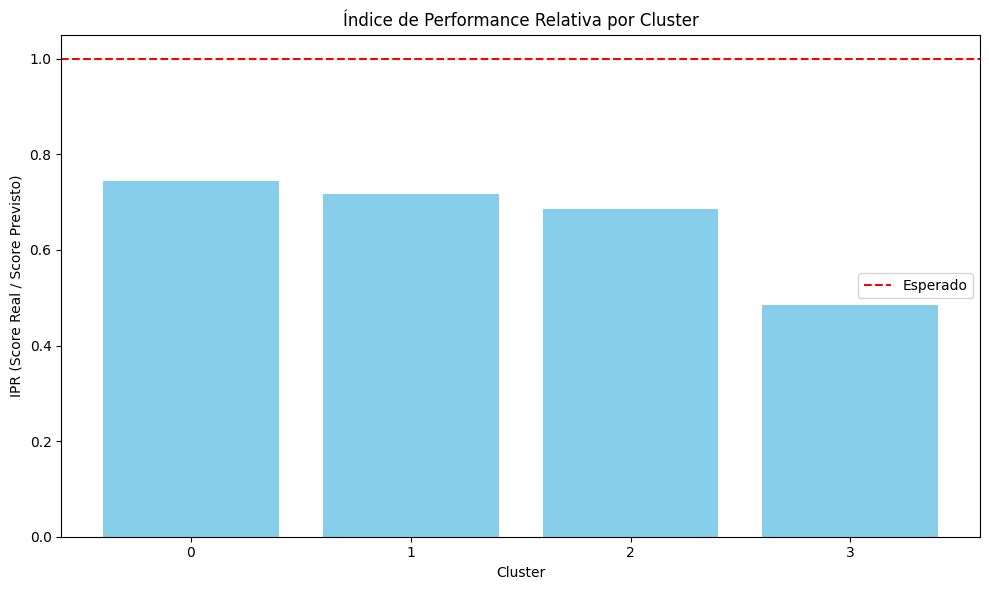

In [832]:
plt.figure(figsize=(10, 6))
plt.bar(comparativo_cluster['Cluster'].astype(str), comparativo_cluster['IPR'], color='skyblue')
plt.axhline(1, color='red', linestyle='--', label='Esperado')
plt.title('Índice de Performance Relativa por Cluster')
plt.xlabel('Cluster')
plt.ylabel('IPR (Score Real / Score Previsto)')
plt.legend()
plt.tight_layout()
plt.show()

0	0.0415	0.0559	0.743	↓↓ Desempenho moderado, mas abaixo do potencial — o cluster entrega razoavelmente bem, mas o modelo esperava mais. Pode estar perdendo eficiência em detalhes.
1	0.0337	0.0470	0.717	↓↓ Baixa eficiência proporcional — alto volume de alcance, mas performance aquém. O conteúdo precisa ser mais afiado pra esse grupo.
2	0.0498	0.0728	0.685	↓↓ Entregando bem, mas ainda com margem — mesmo com o melhor score real da rodada, o modelo esperava uma performance superior.
3	0.0417	0.0859	0.485	↓↓↓ Pior relação entre expectativa e entrega — apesar do tamanho reduzido, esse cluster performa muito abaixo do que deveria. Exige atenção imediata.


5.3 **Correlação entre posts sobre jogos X posts sobre patrocinadores**

A última pergunta que esse estudo se propõe a responder é se existiu uma relação positiva ou negativa entre as meções aos patrocinadores durante o período dos jogos. Para isso começamos gerando um gráfico geral de menções ao longo do tempo:

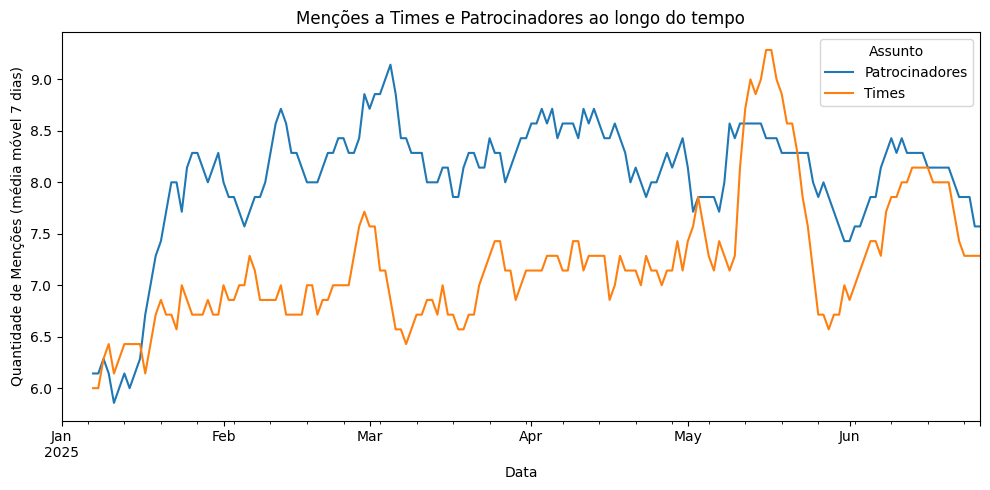

In [833]:
# Garante que a data está no formato datetime
data_encoded['Data de Publicação'] = pd.to_datetime(data_encoded['Data de Publicação'])

# Cria uma nova coluna apenas com o período diário (isso resolve o problema do dt.to_period quebrando o groupby)
data_encoded['Dia'] = data_encoded['Data de Publicação'].dt.to_period('D')

# Garantir que a data está no formato certo
data['Data de Publicação'] = pd.to_datetime(data['Data de Publicação'])

# Criar coluna com o dia (pra facilitar o groupby)
data['Dia'] = data['Data de Publicação'].dt.to_period('D')

# Agrupar por dia e assunto (quantidade de posts por dia por tipo de menção)
menções_diarias = data.groupby(['Dia', 'Assunto']).size().unstack(fill_value=0)

# Aplicar média móvel de 7 dias (pra suavizar as curvas)
menções_suavizadas = menções_diarias.rolling(window=7).mean()

# Plotar
menções_suavizadas.plot(figsize=(10, 5))
plt.title('Menções a Times e Patrocinadores ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Quantidade de Menções (média móvel 7 dias)')
plt.legend(title='Assunto')
plt.tight_layout()
plt.show()


Os picos e quedas acontecem em períodos semelhantes, vamos tentar traçar uma correlação geral:

In [834]:
correlacao = menções_diarias.corr()
print("Correlação entre menções a Times e Patrocinadores:")
print(correlacao)

Correlação entre menções a Times e Patrocinadores:
Assunto         Patrocinadores     Times
Assunto                                 
Patrocinadores        1.000000  0.237422
Times                 0.237422  1.000000


É uma correlação baixa e pouco precisa. Vamos checar se existe uma correlação sequencial:

In [835]:
# Cria uma nova série defasada: menções a times no dia anterior
menções_diarias_lag = menções_diarias.copy()
menções_diarias_lag['Times_lag1'] = menções_diarias_lag['Times'].shift(1)

# Correlação entre menções a patrocinadores e menções a times no dia anterior
corr_lag = menções_diarias_lag[['Patrocinadores', 'Times_lag1']].corr()
print(corr_lag)


Assunto         Patrocinadores  Times_lag1
Assunto                                   
Patrocinadores        1.000000    0.136912
Times_lag1            0.136912    1.000000


Correlação ainda mais baixa. Vamos checar se essa correlação varia durante o período dos jogos (29 de março a 18 de maio):

In [836]:
# Filtra apenas o período dos jogos
periodo_jogos = menções_diarias.loc['2025-03-29':'2025-05-18']

# Correlação dentro do período de jogos
correlacao_jogos = periodo_jogos.corr()
print("Correlação durante os jogos:")
print(correlacao_jogos)


Correlação durante os jogos:
Assunto         Patrocinadores     Times
Assunto                                 
Patrocinadores        1.000000  0.038289
Times                 0.038289  1.000000


5.3.1 A correlação de 0.038 é levemente mais positiva, mas ainda extremamente fraca. Isso demonstra inexistência de uma relação estatística relevante entre os posts que falam de patrocinadores e os que falam de times durante os jogos.

5.3.2 Falta sincronia entre as narrativas. As postagens estão acontecendo, mas não há uma orquestração de conteúdo onde patrocinador e time aparecem juntos. Isso é uma oportunidade perdida de co-branding.

Vamos testar se o mesmo ocorre com o engajamento:

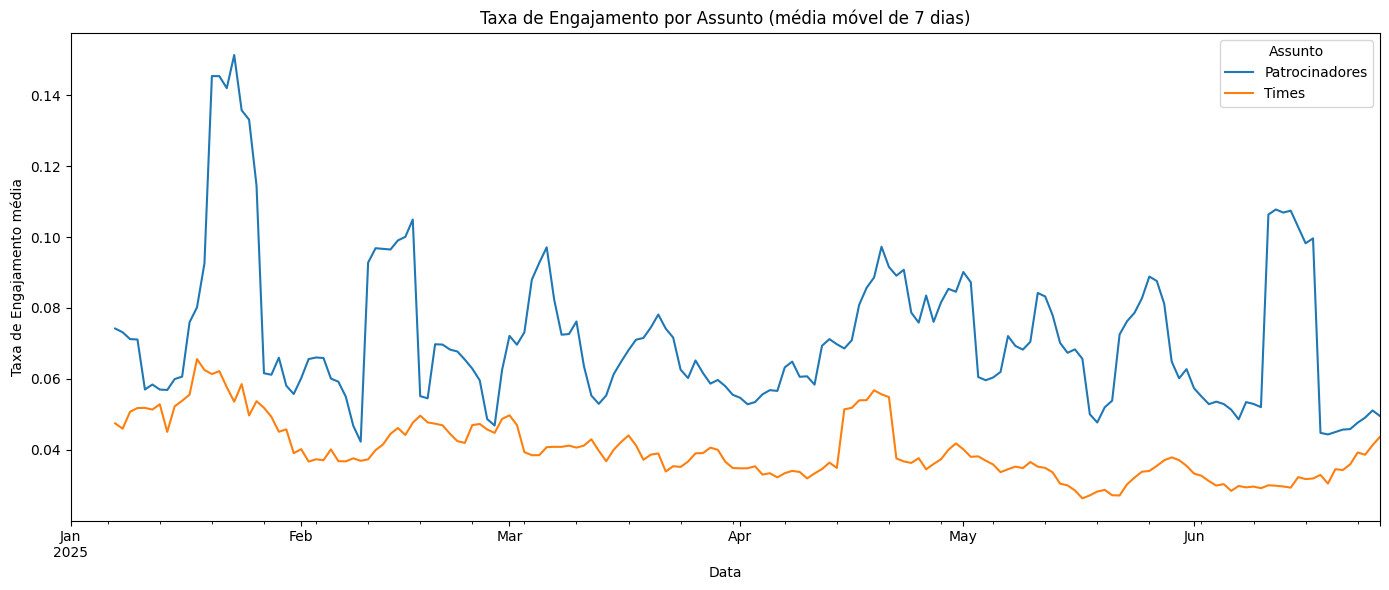

Correlação geral entre taxas de engajamento:
Assunto         Patrocinadores     Times
Assunto                                 
Patrocinadores        1.000000 -0.012597
Times                -0.012597  1.000000

Correlação durante os jogos:
Assunto         Patrocinadores     Times
Assunto                                 
Patrocinadores        1.000000  0.019926
Times                 0.019926  1.000000


In [837]:
# Copia o dataset pra segurança
data_taxa = data.copy()

# Garante que a data está no formato datetime
data_taxa['Data de Publicação'] = pd.to_datetime(data_taxa['Data de Publicação'])

# Cria coluna com o dia
data_taxa['Dia'] = data_taxa['Data de Publicação'].dt.to_period('D')

# Cria a taxa de engajamento
data_taxa['Taxa de Engajamento'] = data_taxa['Engajamento'] / data_taxa['Alcance']

# Filtra: remove outliers (Alcance baixo ou Taxas > 300%)
data_taxa = data_taxa[
    (data_taxa['Alcance'] > 100) &
    (data_taxa['Taxa de Engajamento'] < 3)  # 300%
]

# Agrupa por dia e assunto e tira a média da taxa
taxa_diaria = data_taxa.groupby(['Dia', 'Assunto'])['Taxa de Engajamento'].mean().unstack()

# Preenche possíveis NaNs com 0 (ou np.nan se quiser suavidade)
taxa_diaria = taxa_diaria.fillna(0)

# Aplica média móvel de 7 dias
taxa_suavizada = taxa_diaria.rolling(window=7).mean()

# Plota
plt.figure(figsize=(14, 6))
taxa_suavizada.plot(ax=plt.gca())
plt.title('Taxa de Engajamento por Assunto (média móvel de 7 dias)')
plt.xlabel('Data')
plt.ylabel('Taxa de Engajamento média')
plt.legend(title='Assunto')
plt.tight_layout()
plt.show()

# Correlação geral entre as séries
correlacao_geral = taxa_diaria.corr()
print("Correlação geral entre taxas de engajamento:")
print(correlacao_geral)

# Filtra o período dos jogos
periodo_jogos = taxa_diaria.loc['2025-03-29':'2025-05-18']

# Correlação durante os jogos
correlacao_jogos = periodo_jogos.corr()
print("\nCorrelação durante os jogos:")
print(correlacao_jogos)

Também encontramos valores sem significância estatística para correlações de engajamento. Durante a análise, aplicamos filtros baseados em limites relativos (ex: 300% da média) ou desvios-padrão para remover outliers de engajamento. Esses cortes foram definidos de forma empírica, mas sempre baseados na observação direta da distribuição dos dados e no comportamento típico das métricas de redes sociais, que costumam ter longas caudas à direita (poucos posts que viralizam e puxam a média pra cima).

Testamos diferentes limites (como 200%, 300% e 500%) e observamos que:

Limites baixos (ex: 100% ou 200%) eliminavam muitos dados legítimos, especialmente posts de alta performance;

Limites altos (500%+) mantinham pontos extremos que distorciam o modelo e reduziam a capacidade de generalização;

O corte em 300% da média se mostrou um meio-termo eficiente, permitindo manter posts com desempenho acima da média sem comprometer a robustez estatística da regressão.

Em contextos onde a distribuição de engajamento é naturalmente enviesada, esse tipo de filtro ajuda a trazer estabilidade ao modelo e a revelar padrões reais, sem deixar que raridades dominem os coeficientes.

### **6. Conclusões e recomendações**

6.1 A análise revelou que o engajamento nas postagens da Kings League está diretamente relacionado ao alcance, mas outros fatores como tipo de conteúdo (times vs. patrocinadores), formato de mídia, e rede social influenciam fortemente na performance.

6.2 O modelo preditivo final, com R² 0.68, utiliza Alcance e os clusters gerados com base em variáveis categóricas e quantitativas. Ao comparar valores reais e previstos de engajamento, percebemos que a maioria dos clusters entrega abaixo do esperado, com destaque negativo para o Cluster 0 (IPR = 0.74). Ainda assim, ele se mostrou o modelo mais seguro testado, por reduzir o risco de colinearidade. Saídas futuras para encontrar resultados ainda mais precisos incluem regularizações como Lasso ou Ridge. Outra possibilidade é a inclusão de novas variáveis que não gerem risco de colinearidade, possivelmente categorizações de tipo de conteúdo e perfil poderiam ser interessantes.

6.3 Apesar de postagens sobre “times” terem coeficiente angular mais alto, indicando maior conversão de alcance em engajamento, o conteúdo relacionado a “patrocinadores” apresentou menos variabilidade e mais consistência. Durante o período dos jogos, o engajamento médio das postagens patrocinadas caiu, sugerindo saturação ou menor foco do público em conteúdo de marca durante os eventos principais.

6.4 As correlações entre menções a times e patrocinadores são baixas e pouco expressivas (corr < 0.24), o que reforça que os dois temas têm dinâmicas independentes e podem ser tratados com estratégias distintas.

6.6 Como complemento a esta análise, sugerimos explorar clusters com IPR alto e entender quais conteúdos, formatos e redes eles concentram. Com base nisso, as marcas patrocinadores devem otimizar conteúdos patrocinados, combinando elementos que funcionam bem nos clusters mais eficientes e coordenar melhor a sazonalidade do evento e dos jogos na hora de planejar as ativações.

6.7 Alguns KPIs para ter em mente frente a essas sugestões de melhoria são a correlação entre as conversas sobre a Liga e a marca e o melhor aproveitamento da relação alcance X engajamento.